In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import minmax_scale
from wavenet import mhat, morlet, wavelet_neural_network
from keras.models import Sequential, Model
from keras.layers import Dense, Add, Input
from keras import backend as K
%pylab inline

/home/mart/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.
/home/mart/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


## Load and prepare some data
Create data and make some noise

In [2]:
data = pd.DataFrame(np.sqrt(np.linspace(0, 1, 500)))
train = data.sample(400, replace=True)
train['target'] = train[0]*np.random.normal(loc=1, scale=0.1, size=train[0].shape)+np.random.normal(loc=0, scale=0.1, size=train[0].shape)

In [3]:
X = minmax_scale(train.index)
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

/home/mart/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


And let have some data to draw original function

In [4]:
z_x = minmax_scale(data.index)
z_y = data

/home/mart/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


## Two ways of modelling
### Classical keras
model without bypass:

In [11]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.add(Dense(50, activation=morlet))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [12]:
%%time
model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0)

CPU times: user 12.1 s, sys: 800 ms, total: 12.9 s
Wall time: 7.94 s


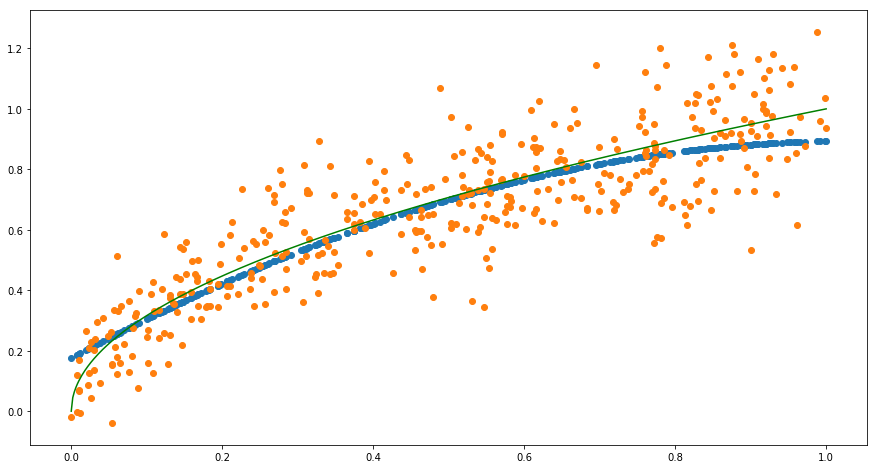

In [13]:
plt.figure(figsize=(15,8))
plt.scatter(X, model.predict(X))
plt.plot(z_x, z_y, 'g')
plt.scatter(X, y)

model with bypass

In [14]:
inp = Input(shape=(1,))
x1 = Dense(50, activation=morlet)(inp)
added = Add()([x1, inp])
out = Dense(1)(added)
model = Model(inp, out)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [15]:
%%time
model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0)

CPU times: user 11.2 s, sys: 668 ms, total: 11.9 s
Wall time: 7.29 s


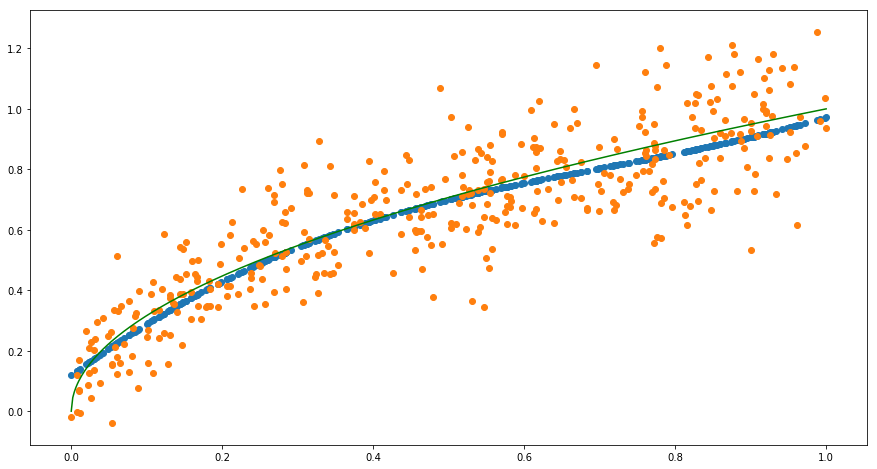

In [16]:
plt.figure(figsize=(15,8))
plt.scatter(X, model.predict(X))
plt.plot(z_x, z_y, 'g')
plt.scatter(X, y)

### model constructor from library
model without bypass

In [7]:
model = wavelet_neural_network(1, 1, 50)
model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0)

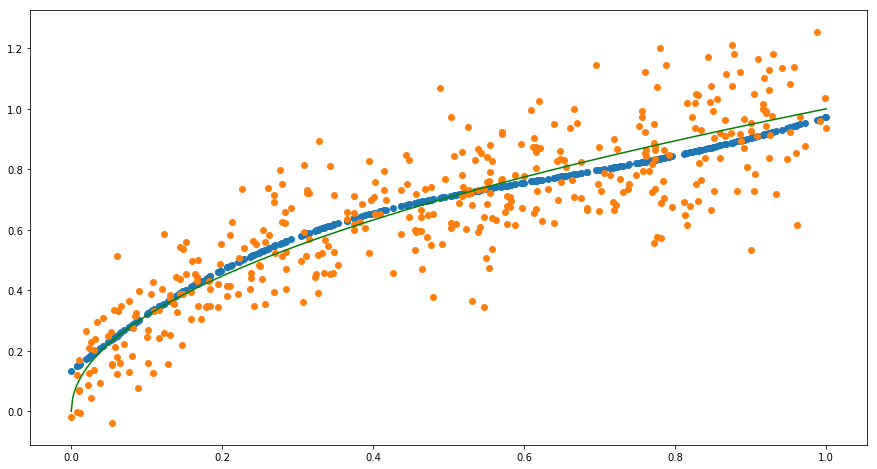

In [8]:
plt.figure(figsize=(15,8))
plt.scatter(X, model.predict(X))
plt.plot(z_x, z_y, 'g')
plt.scatter(X, y)

model with bypass

In [9]:
model = wavelet_neural_network(1, 1, 50, linear_bypass=True)
model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0)

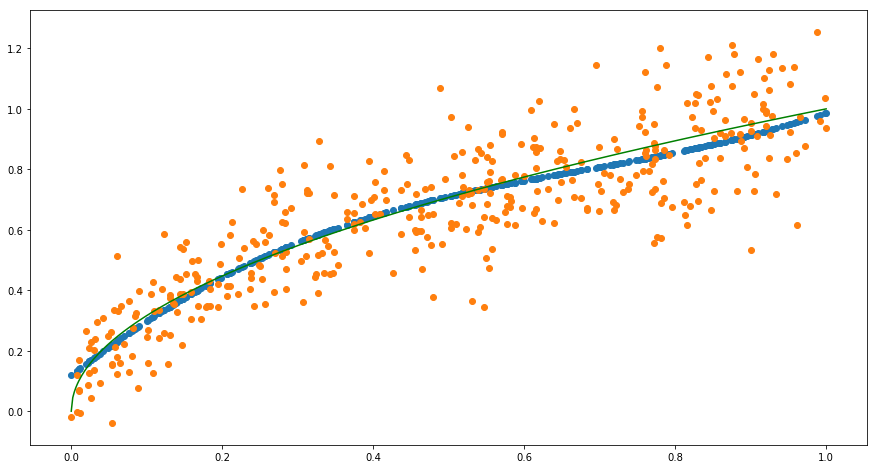

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(X, model.predict(X))
plt.plot(z_x, z_y, 'g')
plt.scatter(X, y)